In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')
dir = '/content/drive/Shared drives/bds-final-project'

Mounted at /content/drive


In [ ]:
from datetime import datetime

In [ ]:
sns.set_style("whitegrid")

In [ ]:
mobility_data = pd.read_csv(f'{dir}/scooter_data_clean.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
mobility_data['start_time'] = mobility_data.start_time.apply(datetime.fromtimestamp)
mobility_data['day'] = mobility_data.start_time.dt.day
mobility_data.head()

,trip_duration,trip_distance,start_time,end_time,month,hour,day_of_week,district_start,district_end,year,tract_start,tract_end,vehicle_type_bicycle,vehicle_type_moped,vehicle_type_scooter,day
0,420,869.0,2018-04-10 20:00:00,1523390400,4,20,2,9.0,9.0,2018,4.845300e+10,4.845300e+10,0,0,1,10
1,371,1037.0,2018-04-10 19:45:00,1523390400,4,19,2,9.0,9.0,2018,4.845300e+10,4.845300e+10,0,0,1,10
2,1687,4491.0,2018-04-23 13:15:00,1524491100,4,13,1,9.0,9.0,2018,4.845300e+10,4.845300e+10,0,0,1,23
3,524,633.0,2018-04-27 21:45:00,1524866400,4,21,5,9.0,9.0,2018,4.845300e+10,4.845300e+10,0,0,1,27
4,322,1114.0,2018-04-27 21:45:00,1524865500,4,21,5,9.0,9.0,2018,4.845300e+10,4.845300e+10,0,0,1,27


In [ ]:
bicycle_data = mobility_data[mobility_data.vehicle_type_bicycle == 1]
moped_data = mobility_data[mobility_data.vehicle_type_moped == 1]
scooter_data = mobility_data[mobility_data.vehicle_type_scooter == 1]

## Plotting by Month of Service

In [ ]:
monthly_timeframe = (scooter_data[['year', 'month']].drop_duplicates()
                                            .sort_values(by=['year', 'month'])
                                            .reset_index(drop=True).reset_index()
                                            .rename(columns={'index':'period'}))
monthly_timeframe

,period,year,month
0,0,2018,4
1,1,2018,5
2,2,2018,6
3,3,2018,7
4,4,2018,8
5,5,2018,9
6,6,2018,10
7,7,2018,11
8,8,2018,12
9,9,2019,1


In [ ]:
def which_month(month_num):
  month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
                5: 'May' ,6: 'Jun', 7: 'Jul',8:'Aug' ,9: 
                'Sept', 10: 'Oct', 11: 'Nov',12: 'Dec'}
  return month_dict[month_num]

def which_dow(weekday_num):
  weekday_dict = {0: 'Sun', 1: 'Mon', 2: 'Tues',
                  3: 'Wed', 4: 'Thur', 5:'Fri', 6: 'Sat'}

  return weekday_dict[weekday_num]

In [ ]:
def plot1_process(df):
  df = df.groupby(['year', 'month']).size().reset_index().rename(columns={0:'num_trips'})
  df= df.sort_values(by=['year', 'month']).reset_index().rename(columns={'index':'order'})
  df['month-year'] = df.month.apply(which_month) + '-' + df.year.apply(str)
  df = df.merge(monthly_timeframe, on=['year', 'month'], how='left')

  return df

In [ ]:
scooter_by_month = plot1_process(scooter_data)
bicycle_by_month = plot1_process(bicycle_data)
moped_by_month = plot1_process(moped_data)

In [ ]:
scooter_by_month.head(10)

,order,year,month,num_trips,month-year,period
0,0,2018,4,55203,Apr-2018,0
1,1,2018,5,8871,May-2018,1
2,2,2018,6,71408,Jun-2018,2
3,3,2018,7,121695,Jul-2018,3
4,4,2018,8,320672,Aug-2018,4
5,5,2018,9,381691,Sept-2018,5
6,6,2018,10,464736,Oct-2018,6
7,7,2018,11,395441,Nov-2018,7
8,8,2018,12,356644,Dec-2018,8
9,9,2019,1,356273,Jan-2019,9


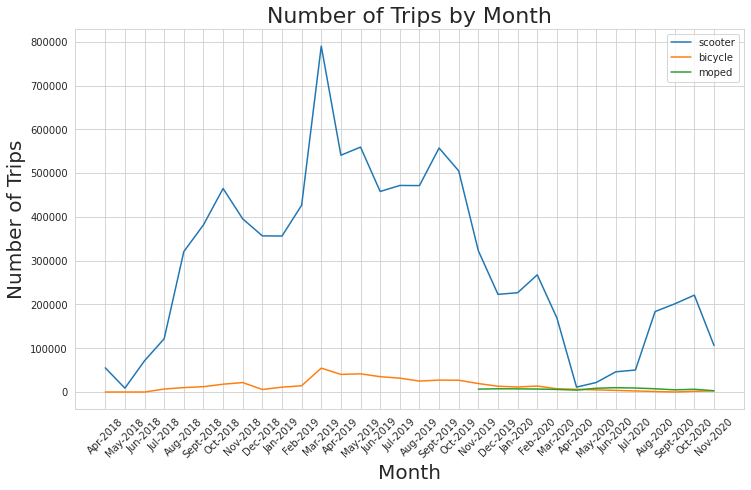

In [ ]:
def plot1(sctr_df, bicl_df, mpd_df):

  sctr_df['Type'] = 'scooter'
  bicl_df['Type'] = 'bicycle'
  mpd_df['Type'] = 'moped'
  fig, ax = plt.subplots(figsize=(12, 7))
  sns.lineplot(data=pd.concat([sctr_df, bicl_df, mpd_df]), x='period', y='num_trips', hue='Type',ax=ax)
  ax.set_xticks(scooter_by_month['period'])
  ax.set_xticklabels(scooter_by_month['month-year'], rotation=45)
  ax.set_xlabel("Month", fontsize=20)
  plt.legend()
  plt.ylabel("Number of Trips", fontsize=20)
  plt.title('Number of Trips by Month', fontsize=22)

  return fig, ax

plot1(scooter_by_month, bicycle_by_month, moped_by_month)

plt.savefig('num_trips_month.png')

Comments on above graph:
* The three types of mobility (scooter, bicycle, moped) have different times at which they have been available to consumers. Most notably mopeds have been around since late 2019 while scooter and bicycles have been around early to mid 2018.
* Scooter rides are by far the most popular choice
* we see an increase in scooter rides from april 2018 through sept 2018 probably because a) more people became accustomed to the new mode of shared mobility and b) more of the vehicles were available from more and more vendors.
* we see seasonality effects where oct-dec 2018 and 2019 had a dip in numbers
* we see the effect of covid-19 as sharp decrease from march to april 2020

## Plotting by Weekday vs Weekend


In [ ]:
bicycle_weekly = mobility_data[mobility_data.vehicle_type_bicycle == 1].groupby(['hour', 'day_of_week']).size().reset_index().rename(columns={0:'num_trips'})
moped_weekly = mobility_data[mobility_data.vehicle_type_moped == 1].groupby(['hour', 'day_of_week']).size().reset_index().rename(columns={0:'num_trips'})
scooter_weekly = mobility_data[mobility_data.vehicle_type_scooter == 1].groupby(['hour', 'day_of_week']).size().reset_index().rename(columns={0:'num_trips'})

data_weekly = pd.concat([bicycle_weekly, moped_weekly, scooter_weekly])
data_weekly['Day'] = data_weekly.day_of_week.apply(which_dow)
data_weekly

,hour,day_of_week,num_trips,Day
0,0,0,2711,Sun
1,0,1,1026,Mon
2,0,2,825,Tues
3,0,3,907,Wed
4,0,4,1081,Thur
...,...,...,...,...
163,23,2,30230,Tues
164,23,3,32321,Wed
165,23,4,47037,Thur
166,23,5,78964,Fri


No handles with labels found to put in legend.


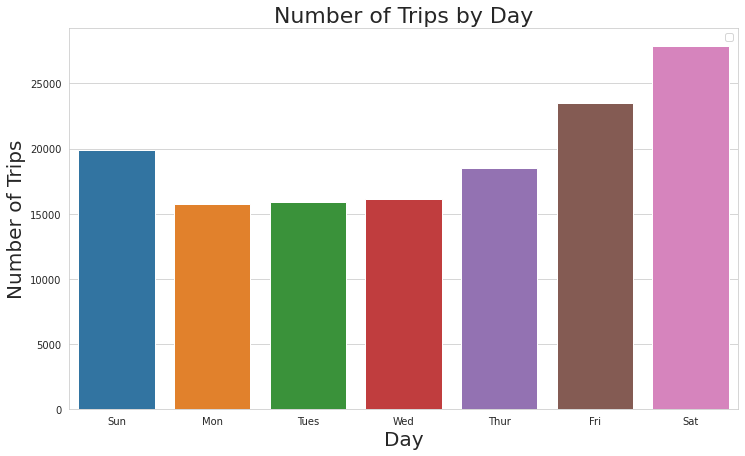

In [ ]:
##Plot by weekday
to_plot = data_weekly.groupby("day_of_week").size().reset_index().rename(columns={0:'num_trips'})
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=data_weekly, x='day_of_week', y='num_trips', ci=None, ax=ax)
plt.title('Number of Trips by Weekday')
ax.set_xticklabels(data_weekly["Day"])
ax.set_xlabel("Day", fontsize=20)
plt.legend()
plt.ylabel("Number of Trips", fontsize=20)
plt.title('Number of Trips by Day', fontsize=22)
plt.savefig('num_trips_day.png')

The plot above shows that shared mobility trips occur mostly on Friday, Saturday and Sunday. Particularly, Saturday shows the highest amount of trips.

## Plotting by Time of Day (hourly)

In [ ]:
data_weekly['Weekend'] = np.where(data_weekly.day_of_week.isin([0,6]), "Weekend", "Weekday")
data_weekly

,hour,day_of_week,num_trips,Day,Weekend
0,0,0,2711,Sun,Weekend
1,0,1,1026,Mon,Weekday
2,0,2,825,Tues,Weekday
3,0,3,907,Wed,Weekday
4,0,4,1081,Thur,Weekday
...,...,...,...,...,...
163,23,2,30230,Tues,Weekday
164,23,3,32321,Wed,Weekday
165,23,4,47037,Thur,Weekday
166,23,5,78964,Fri,Weekday


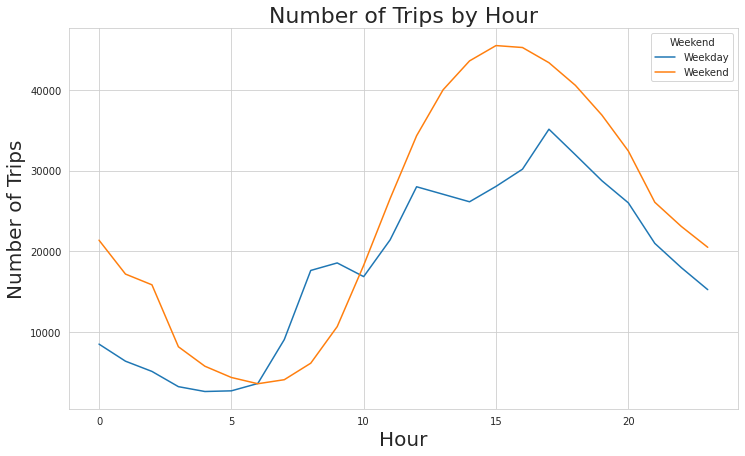

In [ ]:
to_plot = data_weekly.groupby(["hour", "Weekend"])["num_trips"].mean().reset_index().rename(columns={0:'num_trips'})
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=to_plot, x='hour', y='num_trips', hue='Weekend', ax=ax)
ax.set_xlabel("Hour", fontsize=20)
plt.ylabel("Number of Trips", fontsize=20)
plt.title('Number of Trips by Hour', fontsize=22)
plt.savefig('num_trips_hourly.png')

From the plot above, we see that, on average, weekends have a greater number of trips than weekdays. Weekends see a steady rise in number of trips throughout morning and early afternoon hours, peak around 3pm and decrease after. 

For weekdays, we see three peaks: one in the morning, one midday and one in the early evening. These peaks probably correspond to morning and afternoon rush hours, as well as lunch time.

In [ ]:
## create plot of weather
merged_data = pd.read_csv(f'{dir}/merged_data.csv', index_col=0)
merged_data['datestamp'] = pd.to_datetime(merged_data.date, format='%Y-%m-%d')
merged_data['year'] = merged_data.datestamp.dt.year
merged_data['month'] = merged_data.datestamp.dt.month
merged_data['month-year'] = merged_data.month.apply(which_month) + '-' + merged_data.year.apply(str)
merged_data = merged_data.merge(monthly_timeframe, on=['year', 'month'], how='left')
merged_data.head() #daily temperatures

,date,avg_trip_duration,avg_trip_distance,num_bicycle_trips,num_moped_trips,num_scooter_trips,Max_Temperature_F,Avg_Temperature_F,Min_Temperature_F,Max_DewPoint_F,Avg_DewPoint_F,Min_DewPoint_F,Max_Humidity_%,Avg_Humidity_%,Min_Humidity_%,Max_WindSpeed_mph,Avg_WindSpeed_mph,Min_WindSpeed_mph,Max_Pressure_Hg,Avg_Pressure_Hg,Min_Pressure_Hg,Precipitation_inches,datestamp,year,month,month-year,period
0,2018-04-03,943.000000,419.000000,0,0,1,80,72.7,65,71,64.4,40,90,76.6,40,24,12.1,0,29.5,29.2,29.1,0.00,2018-04-03,2018,4,Apr-2018,0
1,2018-04-04,1360.333333,5691.333333,0,0,3,70,59.8,50,49,35.1,30,80,41.6,26,28,13.5,0,29.7,29.6,29.5,0.00,2018-04-04,2018,4,Apr-2018,0
2,2018-04-05,1198.633929,2238.776786,0,0,112,78,68.0,56,67,57.6,47,87,70.0,56,16,9.0,0,29.6,29.4,29.3,0.00,2018-04-05,2018,4,Apr-2018,0
3,2018-04-06,1118.914530,2616.518519,0,0,351,85,75.6,71,71,68.7,67,93,80.1,58,22,12.4,3,29.3,29.2,29.1,0.00,2018-04-06,2018,4,Apr-2018,0
4,2018-04-07,970.707207,1815.882883,0,0,222,72,50.0,41,69,44.6,35,96,81.6,73,28,18.4,12,29.5,29.4,29.2,0.31,2018-04-07,2018,4,Apr-2018,0


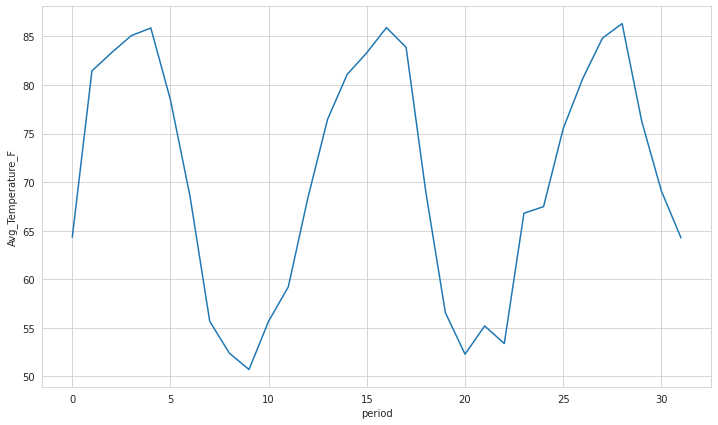

In [ ]:
#aggregate average temperature by month
to_plot = merged_data.groupby(['month', 'year', 'period'])['Avg_Temperature_F'].mean().reset_index().sort_values(by='period')
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=to_plot, x='period', y='Avg_Temperature_F',ax=ax)